In [1]:
import pickle

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [10]:
with open('/content/drive/MyDrive/datasets/ps_split_data_dict.pickle', 'rb') as file:
    data_dict = pickle.load(file)

In [11]:
X_train, X_val, X_holdout = data_dict['X_train'], data_dict['X_val'], data_dict['X_holdout']

In [12]:
y_train, y_val, y_holdout = data_dict['y_train'], data_dict['y_val'], data_dict['y_holdout']

In [2]:
with open('/content/drive/MyDrive/datasets/lr_balanced.pickle', 'rb') as file:
    lr_balanced = pickle.load(file)

In [3]:
with open('/content/drive/MyDrive/datasets/decisiontree.pickle', 'rb') as file:
    decisiontree = pickle.load(file)

In [4]:
with open('/content/drive/MyDrive/datasets/randomforest.pickle', 'rb') as file:
    randomforest = pickle.load(file)

In [5]:
with open('/content/drive/MyDrive/datasets/randomforest2.pickle', 'rb') as file:
    randomforest2 = pickle.load(file)

In [36]:
with open('/content/drive/MyDrive/datasets/xgb.pickle', 'rb') as file:
    xgb = pickle.load(file)

In [39]:
with open('/content/drive/MyDrive/datasets/ps_split_data_dict_25.pickle', 'rb') as file:
    data_dict_25 = pickle.load(file)

In [40]:
X_val_25 = data_dict_25['X_val_25']

In [41]:
models = [
{
    'label': 'Logistic Regression',
    'model': lr_balanced
},
{
    'label': 'Decision Tree',
    'model': decisiontree,
},
{
    'label': 'R Forest: balanced classes',
    'model': randomforest2,
},
{
    'label': 'Random Forest',
    'model': randomforest,
}
]

<Figure size 432x288 with 0 Axes>

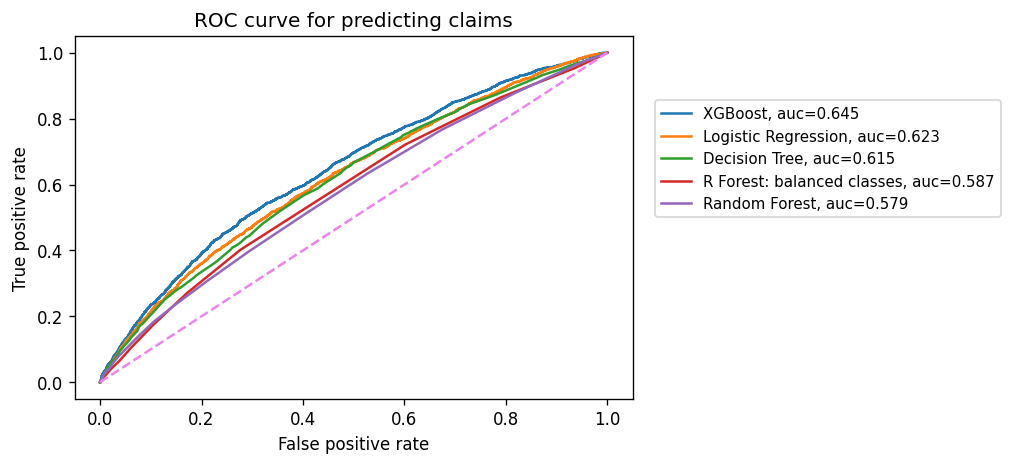

In [44]:
plt.figure(0).clf()

plt.figure(dpi=120)

fpr, tpr, thresh = roc_curve(y_val, xgb.predict_proba(X_val_25)[:,1])
auc = roc_auc_score(y_val, xgb.predict_proba(X_val_25)[:,1])
plt.plot(fpr,tpr,label=f"XGBoost, auc={auc:.3f}")

for m in models:
  model, label = m['model'], m['label']
  fpr, tpr, thresh = roc_curve(y_val, model.predict_proba(X_val)[:,1])
  auc = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])
  plt.plot(fpr,tpr,label=f"{label}, auc={auc:.3f}")

plt.plot([0,1],[0,1],c='violet',ls='--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for predicting claims')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="lower left", borderaxespad=0, prop={'size': 9})

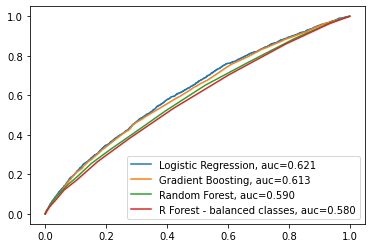

In [14]:
plt.figure(0).clf()

for m in models:
  model, label = m['model'], m['label']
  fpr, tpr, thresh = roc_curve(y_holdout, model.predict_proba(X_holdout)[:,1])
  auc = roc_auc_score(y_holdout, model.predict_proba(X_holdout)[:,1])
  plt.plot(fpr,tpr,label=f"{label}, auc={auc:.3f}")

plt.legend(loc=0)